In [10]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/rock-paper-scissors-dataset/Rock-Paper-Scissors/validation/paper8.png
/kaggle/input/rock-paper-scissors-dataset/Rock-Paper-Scissors/validation/paper1.png
/kaggle/input/rock-paper-scissors-dataset/Rock-Paper-Scissors/validation/rock4.png
/kaggle/input/rock-paper-scissors-dataset/Rock-Paper-Scissors/validation/scissors3.png
/kaggle/input/rock-paper-scissors-dataset/Rock-Paper-Scissors/validation/rock2.png
/kaggle/input/rock-paper-scissors-dataset/Rock-Paper-Scissors/validation/paper3.png
/kaggle/input/rock-paper-scissors-dataset/Rock-Paper-Scissors/validation/paper7.png
/kaggle/input/rock-paper-scissors-dataset/Rock-Paper-Scissors/validation/scissors5.png
/kaggle/input/rock-paper-scissors-dataset/Rock-Paper-Scissors/validation/scissors7.png
/kaggle/input/rock-paper-scissors-dataset/Rock-Paper-Scissors/validation/rock9.png
/kaggle/input/rock-paper-scissors-dataset/Rock-Paper-Scissors/validation/scissors8.png
/kaggle/input/rock-paper-scissors-dataset/Rock-Paper-Scissors/valid

In [15]:
import os


import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten,Dense, Dropout, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping,ReduceLROnPlateau,ModelCheckpoint
from tensorflow.keras.preprocessing import image

In [76]:
from sklearn import svm, datasets
import sklearn.model_selection as model_selection
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn import metrics
from sklearn.model_selection import train_test_split

In [18]:
from IPython.display import clear_output 

from PIL import Image
import seaborn as sns

In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [20]:
TRAINING_DIR = "../input/rock-paper-scissors-dataset/Rock-Paper-Scissors/train"

# Data Augmentation
training_datagen = ImageDataGenerator(rescale = 1./255,
                                      rotation_range=40,
                                      width_shift_range=0.2,
                                      height_shift_range=0.2,
                                      shear_range=0.2,
                                      zoom_range=0.2,
                                      horizontal_flip=True,
                                      fill_mode='nearest')
train_generator = training_datagen.flow_from_directory(TRAINING_DIR,
                                                        target_size=(150,150),
                                                        class_mode='categorical',
                                                       color_mode='grayscale',
                                                       batch_size=126)

VALIDATION_DIR = "../input/rock-paper-scissors-dataset/Rock-Paper-Scissors/validation"
validation_datagen = ImageDataGenerator(rescale = 1./255)
validation_generator = validation_datagen.flow_from_directory(VALIDATION_DIR,
                                                              target_size=(150,150),
                                                              class_mode='categorical',
                                                              color_mode='grayscale',
                                                              batch_size=126)
TEST_DIR = "../input/rock-paper-scissors-dataset/Rock-Paper-Scissors/test"
test_datagen = ImageDataGenerator(rescale=1./255)
test_generator = test_datagen.flow_from_directory(TEST_DIR,
                                                 target_size=(150,150),
                                                 class_mode="categorical",
                                                 color_mode='grayscale',
                                                 batch_size=126)

Found 2520 images belonging to 3 classes.
Found 0 images belonging to 0 classes.
Found 372 images belonging to 3 classes.


In [34]:
train_images = []
train_labels = []

Images to array in Training Directory 

In [36]:
images = os.listdir(TRAINING_DIR)
for key in images:
    for img in os.listdir(TRAINING_DIR+"/"+key):
        train_image =image.load_img(TRAINING_DIR+"/"+key+"/"+img,target_size=(150,150))
        train_image=image.img_to_array(test_image)
        train_image = train_image[:,:,0]
        train_image = np.reshape(train_image, (150,150))
        train_images.append(train_image.flatten())
        train_labels.append(key)

In [37]:
images = os.listdir(TEST_DIR)
for key in images:
    for img in os.listdir(TEST_DIR+"/"+key):
        test_image =image.load_img(TEST_DIR+"/"+key+"/"+img,target_size=(150,150))
        test_image=image.img_to_array(test_image)
        test_image = test_image[:,:,0]
        test_image = np.reshape(test_image, (150,150))
        train_images.append(test_image.flatten())
        train_labels.append(key)

In [38]:
np.shape(train_images)

(2892, 22500)

In [39]:
np.shape(train_labels)

(2892,)

# Label Encoding

In [40]:
labels_key = ["paper", "scissors", "rock"]
from sklearn.preprocessing import LabelEncoder
labelencode = LabelEncoder()
labels = [labelencode.fit_transform(labels_key)]
labels = tf.keras.utils.to_categorical(labels, 3)

In [41]:
import os
images = os.listdir(VALIDATION_DIR)
y_pred= list()
y_true = []
for i in images:
    for key in labels_key:
        if key in i:
            y_true.append(key)
y_true_hot = [labelencode.fit_transform(y_true)]
y_true_hot = tf.keras.utils.to_categorical(y_true_hot, 3)

In [42]:
test_images = []
for i in images:
    location = "../input/rock-paper-scissors-dataset/Rock-Paper-Scissors/validation/"+i
    test_image = image.load_img(location,target_size=(150,150))
    test_image=image.img_to_array(test_image)
    test_image = test_image[:,:,0]
    test_image = np.reshape(test_image, (150,150,1))
    test_images.append(test_image)

## Train test split

In [30]:
X_train, X_test, y_train, y_test = train_test_split(train_images,
                                                    train_labels,
                                                    test_size=0.2,
                                                    random_state=42)

In [44]:
del train_images, train_labels

# Support Vector Machine (SVM) 
## 1) Using polynomial kernal

In [45]:
for i in [0.1, 1, 10, 100]:
    poly = svm.SVC(kernel='poly', degree=3, C=i).fit(X_train, y_train)
    poly_pred = poly.predict(X_test)
    poly_accuracy = accuracy_score(y_test, poly_pred)
    poly_f1 = f1_score(y_test, poly_pred, average='weighted')
    print(f'Accuracy (Polynomial Kernel C={i}): ', "%.2f" % (poly_accuracy*100))
    print('F1 (Polynomial Kernel): ', "%.2f" % (poly_f1*100))

Accuracy (Polynomial Kernel C=0.1):  99.83
F1 (Polynomial Kernel):  99.83
Accuracy (Polynomial Kernel C=1):  99.83
F1 (Polynomial Kernel):  99.83
Accuracy (Polynomial Kernel C=10):  99.83
F1 (Polynomial Kernel):  99.83
Accuracy (Polynomial Kernel C=100):  99.83
F1 (Polynomial Kernel):  99.83


## 2) Using linear Kernal

In [43]:
linear = svm.SVC(kernel='linear').fit(X_train, y_train)
linear_pred = linear.predict(X_test)
linear_accuracy = accuracy_score(y_test, linear_pred)
linear_f1 = f1_score(y_test, linear_pred, average='weighted')
print('Accuracy (linear Kernel): ', "%.2f" % (linear_accuracy*100))
print('F1 (linear Kernel): ', "%.2f" % (linear_f1*100))

Accuracy (linear Kernel):  99.83
F1 (linear Kernel):  99.83


## 3) Using Simoid Kernal 

In [46]:
sigmoid = svm.SVC(kernel='sigmoid', gamma=0.5).fit(X_train, y_train)
sigmoid_pred = sigmoid.predict(X_test)
sigmoid_accuracy = accuracy_score(y_test, sigmoid_pred)
sigmoid_f1 = f1_score(y_test, sigmoid_pred, average='weighted')
print('Accuracy (Sigmoid Kernel): ', "%.2f" % (sigmoid_accuracy*100))
print('F1 (Sigmoid Kernel): ', "%.2f" % (sigmoid_f1*100))

Accuracy (Sigmoid Kernel):  30.92
F1 (Sigmoid Kernel):  14.60


## 4) Using RBF Kernal

In [47]:
rbf = svm.SVC(kernel='rbf', gamma=0.5).fit(X_train, y_train)
rbf_pred = rbf.predict(X_test)
rbf_accuracy = accuracy_score(y_test, rbf_pred)
rbf_f1 = f1_score(y_test, rbf_pred, average='weighted')
print('Accuracy (RBF Kernel): ', "%.2f" % (rbf_accuracy*100))
print('F1 (RBF Kernel): ', "%.2f" % (rbf_f1*100))

Accuracy (RBF Kernel):  30.92
F1 (RBF Kernel):  14.60


# Implementing 2D CNN (Convolution Neural Network)

In [50]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten,Dense, Dropout, BatchNormalization
from tensorflow.keras.backend import clear_session

clear_session()
cnn= Sequential()
cnn.add(Conv2D(filters=64,activation="relu",kernel_size=3,input_shape=(150,150,1)))
cnn.add(MaxPool2D(pool_size=2, strides=2))
cnn.add(Conv2D(filters=64, activation="relu",kernel_size=3))
cnn.add(MaxPool2D(pool_size=2, strides=2))
cnn.add(Conv2D(filters=128, activation="relu",kernel_size=3))
cnn.add(MaxPool2D(pool_size=2, strides=2))
cnn.add(Conv2D(filters=128, activation="relu",kernel_size=3))
cnn.add(MaxPool2D(pool_size=2, strides=2))
cnn.add(Flatten())
cnn.add(Dense(units=256, activation="relu"))
cnn.add(Dense(units=3,activation="softmax"))
cnn.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 64)      640       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 64)        36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 15, 15, 128)       1

In [52]:
# To save a weights,so that they can be loaded later to continue the training from the state saved.
MCP = ModelCheckpoint('Best_points.h5',
                      verbose=1,
                      save_best_only=True,
                      monitor='val_loss',
                      mode='min')
# Early Stopping 
ES = EarlyStopping(verbose=1,
                   patience=18,
                   mode='min')
# Reduce learning rate when a metric has stopped improving.
RLP = ReduceLROnPlateau(monitor='val_loss',
                        patience=5,
                        factor=0.2,
                        min_lr=1e-4)

In [54]:
cnn.compile(optimizer="adam",
            loss="categorical_crossentropy",
            metrics=["accuracy"])
history=cnn.fit(train_generator,
                validation_data= test_generator,
                epochs=60,
                callbacks=[MCP,ES,RLP])

2022-12-11 06:36:21.239369: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/60
20/20 [==============================] - 73s 4s/step - loss: 1.1048 - accuracy: 0.3385 - val_loss: 1.0927 - val_accuracy: 0.4570

Epoch 00001: val_loss improved from inf to 1.09274, saving model to Best_points.h5
Epoch 2/60
20/20 [==============================] - 70s 3s/step - loss: 1.0675 - accuracy: 0.4079 - val_loss: 0.9191 - val_accuracy: 0.5565

Epoch 00002: val_loss improved from 1.09274 to 0.91906, saving model to Best_points.h5
Epoch 3/60
20/20 [==============================] - 70s 3s/step - loss: 0.9358 - accuracy: 0.5234 - val_loss: 0.5319 - val_accuracy: 0.7392

Epoch 00003: val_loss improved from 0.91906 to 0.53195, saving model to Best_points.h5
Epoch 4/60
20/20 [==============================] - 70s 3s/step - loss: 0.6898 - accuracy: 0.6865 - val_loss: 0.3934 - val_accuracy: 0.7608

Epoch 00004: val_loss improved from 0.53195 to 0.39337, saving model to Best_points.h5
Epoch 5/60
20/20 [==============================] - 69s 3s/step - loss: 0.5451 - accuracy: 0

<AxesSubplot:>

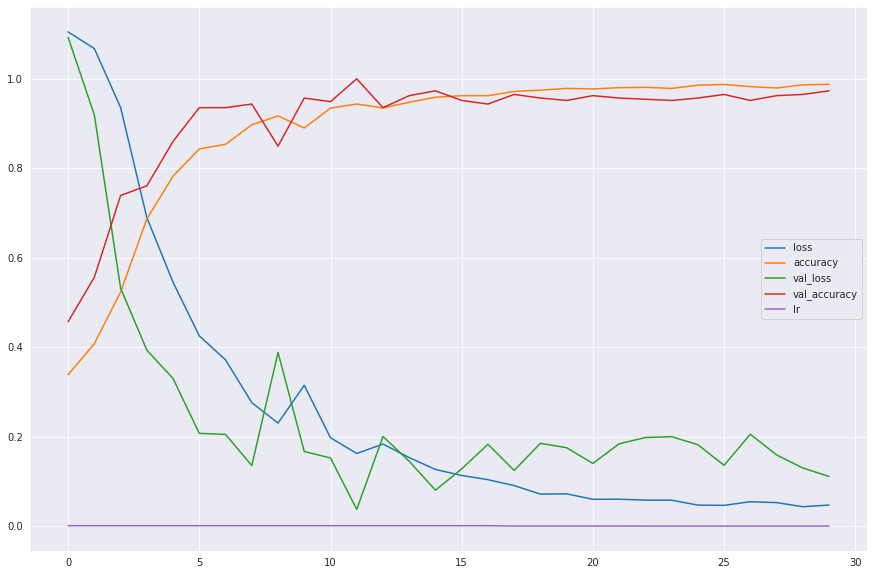

In [55]:
sns.set_style("darkgrid")
pd.DataFrame(cnn.history.history).plot(figsize=(15,10))

In [56]:
cnn.save('my_model.h5')

In [71]:
def predictTest(test_image):
#     test_image=image.load_img(location,target_size=(150,150))
    test_image=image.img_to_array(test_image)
    test_image = test_image[:,:,0]
    test_image = np.reshape(test_image, (150,150,1))
    test_image=np.expand_dims(test_image, axis=0)
    result=cnn.predict(test_image)
    if result[0][0] == 1:
        prediction = "paper"
    elif result[0][1] == 1:
        prediction = "rock"
    else:
        prediction ="scissors"
    return prediction

In [57]:
def predictor(test_image):
#     test_image=image.load_img(location,target_size=(150,150))
    test_image=image.img_to_array(test_image)
    test_image = test_image[:,:,0]
    test_image = np.reshape(test_image, (150,150,1))
    test_image=np.expand_dims(test_image, axis=0)
    result=cnn.predict(test_image)
    if result[0][0] == 1:
        prediction = "It is a paper"
    elif result[0][1] == 1:
        prediction = "It is a rock"
    else:
        prediction ="It is a scissors"
    return prediction

It is a paper


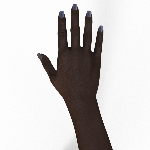

In [58]:
test_image =image.load_img("../input/rock-paper-scissors-dataset/Rock-Paper-Scissors/validation/paper-hires1.png",
                           target_size=(150,150))
print(predictor(test_image))
test_image

It is a rock


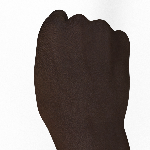

In [59]:
#Lets get another picture and test our model:
test_image =image.load_img("../input/rock-paper-scissors-dataset/Rock-Paper-Scissors/validation/rock-hires1.png",
                           target_size=(150,150))
print(predictor(test_image))
test_image

It is a scissors


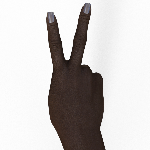

In [60]:
#Lets make another test:
test_image =image.load_img("../input/rock-paper-scissors-dataset/Rock-Paper-Scissors/validation/scissors-hires1.png",
                           target_size=(150,150))
print(predictor(test_image))
test_image

In [69]:
pd.DataFrame(cnn.history.history)

""


In [73]:
import os
images = os.listdir(VALIDATION_DIR)

y_pred= list()
y_true = []
for i in images:
    location = "../input/rock-paper-scissors-dataset/Rock-Paper-Scissors/validation/"+i
    img = image.load_img(location,target_size=(150,150))
    for key in labels_key:
        if key in i:
            y_true.append(key)
    prediction=predictTest(img)
    y_pred.append(prediction)
    
cnn_accuracy = accuracy_score(y_true, y_pred)
cnn_f1 = f1_score(y_true, y_pred, average='weighted')
print('Accuracy: ', "%.2f" % (cnn_accuracy*100))
print('F1: ', "%.2f" % (cnn_f1*100))

Accuracy:  96.97
F1:  96.96


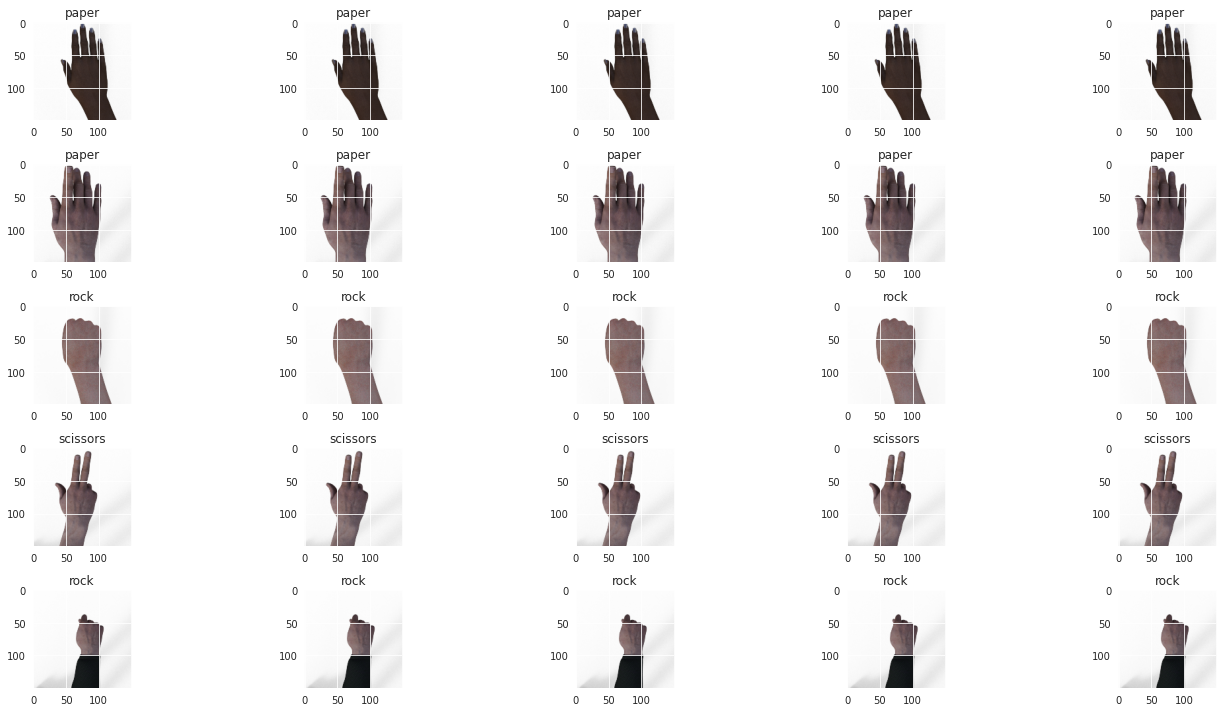

In [74]:
fig, axs = plt.subplots(5, 5, figsize=(20, 10))
count = 0
for i in images[:5]:
  # get the list of images in the particular class
    location = "../input/rock-paper-scissors-dataset/Rock-Paper-Scissors/validation/"+i
  # plot 5 images per class
    img = image.load_img(location,target_size=(150,150))
    for j in range(5):
        axs[count][j].title.set_text(predictTest(img))
        axs[count][j].imshow(img)  
        j+=1

    count += 1
fig.tight_layout()